In [0]:
from jax import grad
import jax.numpy as jaxnp
import matplotlib.pyplot as plt
import numpy as np

In [0]:
data = np.array([1, 2, 3, 4, 5, 1, 2, 5])

In [3]:
np.arange(4)

array([0, 1, 2, 3])

In [0]:
def softmax(x):
  return (np.exp(x)) / np.sum(np.exp(x))

In [5]:
res = softmax(data)
res

array([0.00693927, 0.01886288, 0.05127463, 0.13937889, 0.3788711 ,
       0.00693927, 0.01886288, 0.3788711 ])

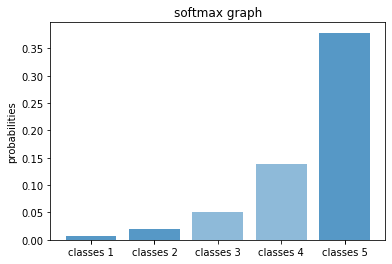

In [6]:
plt.bar(data,res,align='center',alpha=0.5)
plt.xticks(data,('classes 1','classes 2','classes 3', 'classes 4', 'classes 5'))
plt.ylabel('probabilities')
plt.title('softmax graph')
plt.show()

In [0]:
def softmax_derivative(x):
    softmax = (np.exp(x)) / np.sum(np.exp(x))
    result = softmax.reshape(-1,1)
    return np.diagflat(result) - np.dot(result, result.T)

In [0]:
der_softmax = softmax_derivative(data)

In [9]:
print(der_softmax)

[[ 6.89111276e-03 -1.30894553e-04 -3.55808285e-04 -9.67187196e-04
  -2.62908738e-03 -4.81534150e-05 -1.30894553e-04 -2.62908738e-03]
 [-1.30894553e-04  1.85070729e-02 -9.67187196e-04 -2.62908738e-03
  -7.14660045e-03 -1.30894553e-04 -3.55808285e-04 -7.14660045e-03]
 [-3.55808285e-04 -9.67187196e-04  4.86455397e-02 -7.14660045e-03
  -1.94264741e-02 -3.55808285e-04 -9.67187196e-04 -1.94264741e-02]
 [-9.67187196e-04 -2.62908738e-03 -7.14660045e-03  1.19952413e-01
  -5.28066316e-02 -9.67187196e-04 -2.62908738e-03 -5.28066316e-02]
 [-2.62908738e-03 -7.14660045e-03 -1.94264741e-02 -5.28066316e-02
   2.35327789e-01 -2.62908738e-03 -7.14660045e-03 -1.43543307e-01]
 [-4.81534150e-05 -1.30894553e-04 -3.55808285e-04 -9.67187196e-04
  -2.62908738e-03  6.89111276e-03 -1.30894553e-04 -2.62908738e-03]
 [-1.30894553e-04 -3.55808285e-04 -9.67187196e-04 -2.62908738e-03
  -7.14660045e-03 -1.30894553e-04  1.85070729e-02 -7.14660045e-03]
 [-2.62908738e-03 -7.14660045e-03 -1.94264741e-02 -5.28066316e-02
  -

In [10]:
derivative = np.diagonal(der_softmax)
derivative

array([0.00689111, 0.01850707, 0.04864554, 0.11995241, 0.23532779,
       0.00689111, 0.01850707, 0.23532779])

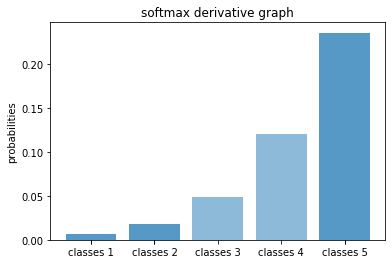

In [11]:
plt.bar(data,derivative,align='center',alpha=0.5)
plt.xticks(data,('classes 1','classes 2','classes 3', 'classes 4', 'classes 5'))
plt.ylabel('probabilities')
plt.title('softmax derivative graph')
plt.show()

In [0]:
def softmax_jax(element,array):
  return jaxnp.exp(array[element]) / jaxnp.sum(jaxnp.exp(array))

In [13]:
data_jax = jaxnp.array([1.0, 2.0, 3.0, 4.0, 5.0, 1.0, 2.0, 5.0])

/usr/local/lib/python3.6/dist-packages/jax/lib/xla_bridge.py:119: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [0]:
der_softmax_jax = grad(softmax_jax,1)

In [0]:
result_jax=[]
for i in range(len(data_jax)):
  derivative = der_softmax_jax(i,data_jax)
  result_jax.append(derivative)

In [16]:
result_jax

[DeviceArray([ 6.8911123e-03, -1.3089456e-04, -3.5580830e-04,
              -9.6718728e-04, -2.6290875e-03, -4.8153415e-05,
              -1.3089456e-04, -2.6290875e-03], dtype=float32),
 DeviceArray([-0.00013089,  0.01850707, -0.00096719, -0.00262909,
              -0.0071466 , -0.00013089, -0.00035581, -0.0071466 ],            dtype=float32),
 DeviceArray([-0.00035581, -0.00096719,  0.04864554, -0.0071466 ,
              -0.01942648, -0.00035581, -0.00096719, -0.01942648],            dtype=float32),
 DeviceArray([-0.00096719, -0.00262909, -0.0071466 ,  0.11995241,
              -0.05280664, -0.00096719, -0.00262909, -0.05280664],            dtype=float32),
 DeviceArray([-0.00262909, -0.0071466 , -0.01942648, -0.05280664,
               0.2353278 , -0.00262909, -0.0071466 , -0.14354332],            dtype=float32),
 DeviceArray([-4.8153415e-05, -1.3089456e-04, -3.5580830e-04,
              -9.6718728e-04, -2.6290875e-03,  6.8911123e-03,
              -1.3089456e-04, -2.6290875e-03], dt

In [17]:
derivative_jax = np.diagonal(result_jax)
derivative_jax

array([0.00689111, 0.01850707, 0.04864554, 0.11995241, 0.2353278 ,
       0.00689111, 0.01850707, 0.2353278 ], dtype=float32)

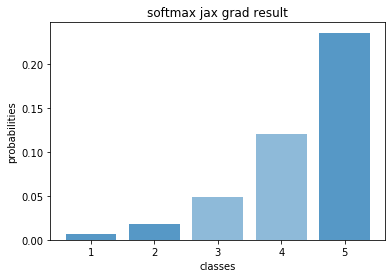

In [18]:
plt.bar(data_jax,derivative_jax, align='center', alpha=0.5)
plt.xlabel('classes')
plt.ylabel('probabilities')
plt.title('softmax jax grad result')
plt.show()